# URL Classification model using Machine Learning
### For Computer Science B.Sc. Ariel University

**By Yuval Yurzdichansky, Matan Aviv and Roy Simanovich**

## Introduction
In this project we will build a machine learning model that will classify URLs based on if they are malicious (phishing, malware, etc.) or benign. We will use a dataset of URLs that are labeled as either malicious or benign and use it to train a model that will be able to classify new URLs.

### Install and import libraries

In [ ]:
# Some importent libraries installtion via pip
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install tensorflow

In [1]:
# Importing the libraries for the project #

## Regular Libraries that's come with python
### Data Manipulation and Analysis
import pandas as pd
### Numerical Computing
import numpy as np
### Collection of Data Structures
import collections as col
### Regular Expressions
import re as regex
### URL Handling
import urllib as urlhndl
### Mathematical Operations
import math
### Socket Programming
import socket
### Plot graphs
import matplotlib.pyplot as plt

## SKLearn Libraries for Machine Learning
### Splitting the data into training and testing
from sklearn.model_selection import train_test_split
### Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc, precision_recall_curve
### Preprocessing the Data
from sklearn.utils import resample
### TF-IDF Vectorizer for Text Data
from sklearn.feature_extraction.text import TfidfVectorizer
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
### Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
### Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
### K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

## Tensorflow Libraries for Deep Learning
import tensorflow as tf

## Pickle for saving the model to disk
import pickle as pkl

C:\Users\siman\AppData\Local\Temp\ipykernel_7308\1511673365.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Feature extraction functions
We will use the following feature extraction functions to extract features from the URLs:
1. `get_url_length`: This function returns the length of the URL.
2. `get_dot_count`: This function returns the number of dots in the URL.
3. `get_hyphen_count_in_domain`: This function returns the number of hyphens in the domain of the URL.
4. `contains_security_sensitive_words`: This function returns 1 if the URL contains security sensitive words (e.g., "login", "signin", "account", etc.) and 0 otherwise.
5. `get_directory_length`: This function returns the length of the directory part of the URL.
6. `get_sub_directory_count`: This function returns the number of subdirectories in the URL.
7. `contains_ip`: This function returns 1 if the URL contains an IP address and 0 otherwise.
8. `get_token_count_in_path`: This function returns the number of tokens in the path part of the URL.
9. `get_largest_token_length`: This function returns the length of the largest token in the path part of the URL.
10. `get_avarage_token_length`: This function returns the average length of the tokens in the path part of the URL.
11. `get_file_length`: This function returns the length of the file part of the URL.
12. `get_dot_count_in_file`: This function returns the number of dots in the file part of the URL.
13. `get_delimiter_count_in_file`: This function returns the number of delimiters in the file part of the URL.
14. `get_arguments_length`: This function returns the length of the arguments part of the URL.
15. `get_number_of_arguments`: This function returns the number of arguments in the URL.
16. `get_length_of_largest_argument_value`: This function returns the length of the largest argument value in the URL.
17. `get_max_delimiters_in_arguments`: This function returns the maximum number of delimiters in the arguments part of the URL.
18. `get_domain_features`: This function returns the following features of the domain part of the URL: length, number of dots, number of hyphens, number of digits, number of special characters, entropy, whether the domain is a subdomain, and whether the domain is an IP address.
19. `get_special_character_count`: This function returns the number of special characters in the URL.
20. `get_entropy`: This function returns the entropy of the URL.
21. `check_url_shortened`: This function returns 1 if the URL is shortened and 0 otherwise.
22. `get_port_number`: This function returns the port number of the URL, if it exists, and -1 otherwise.
23. `get_subdomain_count`: This function returns the number of subdomains in the URL.
24. `get_suspicious_tld`: This function returns 1 if the top-level domain (TLD) of the URL is suspicious (e.g., "tk", "ml", "ga", etc.) and 0 otherwise.
25. `get_numeric_ratio`: This function returns the ratio of numeric characters in the URL.
26. `get_word_count`: This function returns the number of words in the URL.
27. `get_url_is_internationalized`: This function returns 1 if the URL is internationalized and 0 otherwise.

In [2]:
# Function to concatenate "https://" to benign URLs 
def add_https(url, label):
    if label == 0:
        return "https://" + url
    else:
        return url

def ensure_scheme(url):
    if not urlhndl.parse.urlparse(url).scheme:
        url = 'https://' + url
    return url

# Feature extraction functions
def get_url_length(url):
    return len(url)

def get_dot_count(url):
    return url.count('.')

def contains_security_sensitive_words(url):
    security_sensitive_words = [
    'login', 'password', 'admin', 'root', 'secret', 'private', 'secure', 'confidential', 
    'bank', 'creditcard', 'account', 'authentication', 'authorization', 'session', 'token', 
    'apikey', 'ssl', 'https', 'secure', 'encrypted', 'auth', 'signin', 'signup', 'verification', 
    'resetpassword', 'change-password', 'forgot-password', 'otp', '2fa', 'phishing', 'malware', 
    'virus', 'trojan', 'exploit', 'hacker', 'attack', 'security', 'vulnerable', 'injection', 
    'xss', 'csrf', 'dos', 'ddos', 'bruteforce', 'firewall', 'vpn', 'proxy', 'tor', 'security-question', 
    'privacy-policy']
    return int(any(word in url for word in security_sensitive_words))

def get_directory_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    return len(path)

def get_sub_directory_count(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    return path.count('/') - 1

def get_token_count_in_path(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = path.split('/')
    return len(tokens) - 1

def get_largest_token_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = path.split('/')
    if tokens:
        return max(len(token) for token in tokens)
    return 0

def get_average_token_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = [token for token in path.split('/') if token]
    if tokens:
        return np.mean([len(token) for token in tokens])
    return 0

def get_file_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    return len(filename)

def get_dot_count_in_file(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    return filename.count('.')

def get_delimiter_count_in_file(url):
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    delimiters = ['.', '_', '-']
    return sum(filename.count(delimiter) for delimiter in delimiters)

def get_arguments_length(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    return len(query)

def get_number_of_arguments(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    return len(urlhndl.parse.parse_qs(query))

def get_length_of_largest_argument_value(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    params = urlhndl.parse.parse_qs(query)
    if params:
        return max(len(max(values, key=len)) for values in params.values())
    return 0

def get_max_delimiters_in_arguments(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    params = urlhndl.parse.parse_qs(query)
    delimiters = ['&', '=', '-', '_']
    if params:
        return max(sum(value.count(delimiter) for delimiter in delimiters) for values in params.values() for value in values)
    return 0


def get_hyphen_count_in_domain(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    return domain.count('-')

def contains_ip(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    try:
        socket.inet_aton(domain)
        return 1
    except:
        return 0
    
def get_domain_features(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(ensure_scheme(url)).netloc
    tokens = domain.split('.')
    
    # Domain Length
    domain_length = len(domain)
    
    # Count of Tokens in the Domain
    token_count = len(tokens)
    
    # Length of Largest Token in the Domain
    largest_token_length = max(len(token) for token in tokens) if tokens else 0
    
    # Average Domain Token Length
    average_token_length = sum(len(token) for token in tokens) / len(tokens) if tokens else 0
    
    return domain_length, token_count, largest_token_length, average_token_length

# New feature extraction functions
def get_special_character_count(url):
    special_characters = ['@', '=', '+', '*', '?', '&', '%', '$', '#', '!']
    return sum(url.count(char) for char in special_characters)

def get_entropy(url):
    # Count the frequency of each character in the string
    freq = col.Counter(url)
    # Calculate the probabilities
    probs = [count / len(url) for count in freq.values()]
    # Calculate the Shannon entropy
    entropy = -sum(p * math.log(p, 2) for p in probs if p > 0)
    return entropy

def check_url_shortened(url):
    shortened_services = ['bit.ly', 'tinyurl.com', 'goo.gl', 'ow.ly', 't.co']
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    return int(domain in shortened_services)

def get_subdomain_count(url):
    url = ensure_scheme(url)
    domain_parts = urlhndl.parse.urlparse(url).netloc.split('.')
    # Count as subdomains any parts beyond the second-level domain and TLD
    return max(0, len(domain_parts) - 2)

def get_suspicious_tld(url):
    suspicious_tlds = ['xyz', 'top', 'loan', 'win', 'club']
    url = ensure_scheme(url)
    tld = urlhndl.parse.urlparse(url).netloc.split('.')[-1]
    return int(tld in suspicious_tlds)

def get_numeric_ratio(url):
    numeric_chars = sum(c.isdigit() for c in url)
    return numeric_chars / len(url) if len(url) > 0 else 0

def get_word_count(url):
    words = regex.findall(r'\w+', url)
    return len(words)

def is_https(url, timeout=0.5):
    return int(url.startswith("https"))

### Now load the dataset and do some preprocessing on it
The dataset is a CSV file with two columns: `url` and `label`. The `url` column contains the URL and the `label` column contains the label of the URL. The label is 1 if the URL is malicious and 0 if the URL is benign. Since the dataset is huge (more than 1 million rows), we will only use a small subset of it for this project (150,000 rows for each class, 300,000 rows in total).

In [3]:
# Load the dataset
df = pd.read_csv('url_dataset_updated.csv')

# Drop all duplicates from df
df = df.drop_duplicates()

# Reset the index after dropping duplicates
df = df.reset_index(drop=True)

# Name of the URL column, change this if your dataset has a different column name
url_column_name = 'URL'

# Apply the function to the URL column
df[url_column_name] = df.apply(lambda row: add_https(row[url_column_name], row['Label']), axis=1)

# Separate the dataset into malicious and benign
malicious_df = df[df['Label'] == 1]
benign_df = df[df['Label'] == 0]

# Randomly sample 150,000 entries from each
malicious_sampled_df = resample(malicious_df, n_samples=150000, random_state=42)
benign_sampled_df = resample(benign_df, n_samples=150000, random_state=42)

# Combine the sampled data
balanced_df = pd.concat([malicious_sampled_df, benign_sampled_df])

# Shuffle the combined dataset to mix malicious and benign URLs
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print('Balanced Dataset Shape:', balanced_df.shape)
print('Balanced Dataset Distribution:', balanced_df['Label'].value_counts())
print('Balanced Dataset Head (First 10 Rows):')
print(balanced_df.head(10))

# Now, balanced_df contains the balanced dataset ready for further processing

Balanced Dataset Shape: (300000, 2)
Balanced Dataset Distribution: Label
1    150000
0    150000
Name: count, dtype: int64
Balanced Dataset Head (First 10 Rows):
                                                 URL  Label
0  http://etransfers.interac.ca-ssl.net/sh/2o05I9...      1
1  http://betterhealthsmoothies.com/Adobe/adobe-3...      1
2  http://lloydsbank.deregister-payee-secure-auth...      1
3                                 https://archive.md      0
4                      https://pkg00-atx.netgate.com      0
5  https://www.shareholds.com/gbr/5df72f77-f30d-4...      1
6                  https://sub-166-141-241.myvzw.com      0
7     https://hgdggdgfghygsugfytsfgssytstys.gq/83cbc      1
8                    https://www.commbanknetcode.com      1
9                    https://autodiscover.ons.gov.uk      0


## Start testing with the options
**NOTE:** We'll split the truncated dataset into a training set and a test set (80% training, 20% test) and use the training set to train the model and the test set to evaluate the model.

### Feature extraction preprocessing
We'll get the features from the URLs using the feature extraction functions.

In [4]:
# Apply feature extraction
print('Feature extraction...')
features = balanced_df['URL'].apply(lambda x: pd.Series({
    'url_length': get_url_length(x),
    'dot_count': get_dot_count(x),
    'hyphen_count_domain': get_hyphen_count_in_domain(x),
    'security_sensitive_words': contains_security_sensitive_words(x),
    'directory_length': get_directory_length(x),
    'sub_directory_count': get_sub_directory_count(x),
    'token_count_path': get_token_count_in_path(x),
    'largest_token_length': get_largest_token_length(x),
    'average_token_length': get_average_token_length(x),
    'file_length': get_file_length(x),
    'contains_ip': contains_ip(x),
    'dot_count_in_file': get_dot_count_in_file(x),
    'delimiter_count_in_file': get_delimiter_count_in_file(x),
    'arguments_length': get_arguments_length(x),
    'number_of_arguments': get_number_of_arguments(x),
    'length_of_largest_argument_value': get_length_of_largest_argument_value(x),
    'max_delimiters_in_arguments': get_max_delimiters_in_arguments(x),
    'special_character_count': get_special_character_count(x),
    'entropy': get_entropy(x),
    'url_shortened': check_url_shortened(x),
    'subdomain_count': get_subdomain_count(x),
    'suspicious_tld': get_suspicious_tld(x),
    'numeric_ratio': get_numeric_ratio(x),
    'domain_length': get_domain_features(x)[0],
    'domain_token_count': get_domain_features(x)[1],
    'largest_domain_token_length': get_domain_features(x)[2],
    'average_domain_token_length': get_domain_features(x)[3],
    'word_count': get_word_count(x),
    'is_https': is_https(x)
}))

# Concatenate original DF with features
balanced_df = pd.concat([balanced_df, features], axis=1)

# Regex tokenization function
def tokenize_url(url):
    # Tokenize the URL using regex
    tokens = regex.findall(r'\w+', url)
    return ' '.join(tokens)

# Tokenize the URLs
print('Tokenizing URLs...')
balanced_df['URL'] = balanced_df['URL'].apply(tokenize_url)
print('Tokenization complete.')

print('Balanced Dataset Shape:', balanced_df.shape)
print('Balanced Dataset:')
print(balanced_df)

Feature extraction...
Tokenizing URLs...
Tokenization complete.
Balanced Dataset Shape: (300000, 31)
Balanced Dataset:
                                                      URL  Label  url_length  \
0       http etransfers interac ca ssl net sh 2o05I9 b...      1        65.0   
1       http betterhealthsmoothies com Adobe adobe 3D6...      1        58.0   
2       http lloydsbank deregister payee secure auth c...      1        60.0   
3                                        https archive md      0        18.0   
4                             https pkg00 atx netgate com      0        29.0   
...                                                   ...    ...         ...   
299995         https infomation fb service e82443 repl co      1        44.0   
299996                     https img 1000736 ad score com      0        32.0   
299997                  http sosyalsat com help home html      1        35.0   
299998  https storageapi fleek co 12678f8a 04f9 4b69 a...      1        83.0   
2

### TF-IDF Vectorizer preprocessing
We will start by using the TF-IDF vectorizer to convert the URLs into numerical features for preprocessing, and split the dataset into a training set and a test set.

In [5]:
# Extracting TF-IDF features from URLs
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features

# Fit and transform the TF-IDF vectorizer
print('Fitting and transforming the TF-IDF Vectorizer (max_features=5000) to the URLs in the dataset...')
tfidf_features = tfidf_vectorizer.fit_transform(balanced_df['URL'])
print('TF-IDF Vectorization complete.')

# Convert TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray
print('Converting TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray...')
tfidf_dense = np.asarray(tfidf_features.todense())
print('Conversion complete.')

# Define X for numerical features
X_numerical = balanced_df.drop(['Label', 'URL'], axis=1).values  # Make sure this matches your feature extraction output

# Combining TF-IDF features with numerical features
print('Combining TF-IDF features with numerical features...')
X_combined = np.hstack((X_numerical, tfidf_dense))
print('Combination complete.')

# Define y
y = balanced_df['Label'].values

# Save the TF-IDF vectorizer to disk
print('Saving the TF-IDF Vectorizer to disk...')
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pkl.dump(tfidf_vectorizer, f)
print('TF-IDF Vectorizer saved to disk.')

# Split the data into training and testing sets
print('Splitting the data into training and testing sets...')
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
print('Data split complete.')

Fitting and transforming the TF-IDF Vectorizer (max_features=5000) to the URLs in the dataset...
TF-IDF Vectorization complete.
Converting TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray...
Conversion complete.
Combining TF-IDF features with numerical features...
Combination complete.
Saving the TF-IDF Vectorizer to disk...
TF-IDF Vectorizer saved to disk.
Splitting the data into training and testing sets...
Data split complete.


### Logistic Regression model
We will use the logistic regression model to classify the URLs and evaluate the model using the test set. We'll use 10,000 iterations.

In [ ]:
# Model Training with Logistic Regression
print('Training the Logistic Regression model with max_iter=10000 and random_state=42...')
lr_model = LogisticRegression(random_state=42, max_iter=10000) # Increase max_iter if the model does not converge
lr_model.fit(X_train, y_train)
print('Logistic Regression model training complete, making predictions...')

# Predictions and Evaluation
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print('Saving the Logistic Regression model to disk...')

# Save the model to disk
with open('logistic_regression_model.pkl', 'wb') as f:
    pkl.dump(lr_model, f)

print('Logistic Regression model saved to disk.')

### Guassian Naive Bayes model
We will use the Guassian Naive Bayes model to classify the URLs and evaluate the model using the test set.

In [ ]:
# Model Training with GaussianNB
print('Training the Gaussian Naive Bayes model with the combined features...')
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print('Gaussian Naive Bayes model training complete, making predictions...')

# Predictions and Evaluation
y_pred = gnb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print('Saving the Gaussian Naive Bayes model to disk...')

# Save the model to disk
with open('gaussian_nb_model.pkl', 'wb') as f:
    pkl.dump(gnb_model, f)

print('Gaussian Naive Bayes model saved to disk.')

### Random Forest model
Next, we will use the random forest model to classify the URLs and evaluate the model using the test set. The model will use 100 estimators (trees).

In [8]:
# Model Training with RandomForestClassifier
print('Training the Random Forest model with 100 estimators and a random state of 42...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print('Random Forest model training complete, making predictions...')

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print('Testing the Random Forest model with different thresholds...')

# Use threshold to improve the model. Testing all the thresholds from 0.1 to 0.9
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0
best_threshold = 0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (rf_model.predict_proba(X_test)[:,1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('\n')

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

print('Saving the Random Forest model to disk...')

# Save the model to disk
with open('random_forest_model.pkl', 'wb') as f:
    pkl.dump(rf_model, f)

print('Random Forest model saved to disk.')

Training the Random Forest model with 100 estimators and a random state of 42...
Random Forest model training complete, making predictions...
Accuracy: 0.9786
Confusion Matrix:
 [[29782   280]
 [ 1004 28934]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     30062
           1       0.99      0.97      0.98     29938

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

Testing the Random Forest model with different thresholds...
Threshold: 0.05
Accuracy: 0.8972
Confusion Matrix:
 [[24148  5914]
 [  254 29684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89     30062
           1       0.83      0.99      0.91     29938

    accuracy                           0.90     60000
   macro avg       0.91      0.90      0.90     60000


### K-Nearest Neighbors model
We will use K-nearest neighbors model to classify the URLs and evaluate the model using the test set. We'll use 490 neighbors.

In [ ]:
# K-Nearest Neighbors Classifier
print('Training the K-Nearest Neighbors model with k=490...')
knn_model = KNeighborsClassifier(n_neighbors=490)  
knn_model.fit(X_train, y_train)
print('K-Nearest Neighbors model training complete, making predictions...')

# Predictions and Evaluation
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print('Saving the K-Nearest Neighbors model to disk...')

# Dump the model to disk
with open('knn_model.pkl', 'wb') as f:
    pkl.dump(knn_model, f)

print('K-Nearest Neighbors model saved to disk.')

### Decision Tree model
We will use Decision Tree model to classify the URLs and evaluate the model using the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print('Training the Decision Tree model with a random state of 42...')
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print('Decision Tree model training complete, making predictions...')

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


print('Saving the Decision Tree model to disk...')

# Save the model to disk
with open('decision_tree_model.pkl', 'wb') as f:
    pkl.dump(rf_model, f)

print('Decision Tree model saved to disk.')

## TensorFlow neural network, with feature extraction
Now let's use a neural network to classify the URLs. We will use the feature extraction functions to extract features from the URLs and then use a neural network to classify the URLs. We will use the same training and test sets as before. As the same, the training set is 80% and the test set is 20%.

### Preprocessing for Deep Learning Model

In [5]:
# Tokenization and sequence padding parameters
max_len = 1000  # Maxiumum length of the sequence
max_words = 240000  # 80% of the total vocabulary size (300,000)

print('Tokenizing and sequence padding the URLs...')

# Convert all columns to strings and concatenate them
text_data = balanced_df.drop(['Label'], axis=1).astype(str).apply(lambda x: ' '.join(x), axis=1).values

# Tokenize and sequence pad all features
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Pad the sequences
data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

# Add TF-IDF features to the data
#data = np.hstack((data, tfidf_dense))

print('Tokenization and sequence padding complete.')

# Labels
labels = np.asarray(balanced_df['Label'])
labels = tf.keras.utils.to_categorical(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Tokenizing and sequence padding the URLs...
Tokenization and sequence padding complete.


### Using RNN model with feature extraction

In [6]:
# RNN model definition
print('Defining the RNN model...')
RNN_model = tf.keras.models.Sequential()
RNN_model.add(tf.keras.layers.Embedding(max_words, 32, input_length=max_len))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
RNN_model.add(tf.keras.layers.Dropout(0.5))
RNN_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
RNN_model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
RNN_model.add(tf.keras.layers.Dropout(0.5))
RNN_model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
print('Compiling the RNN model...')
RNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Define early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=30, restore_best_weights=True)

# Train the model with early stopping, using the GPU if available (requires TensorFlow-GPU), or the CPU otherwise, for 30 epochs
# If the model does not improve for 3 consecutive epochs, training will stop early
print('Training the RNN model with early stopping...')

history = RNN_model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

print('RNN model training complete')

print('Saving the RNN model to disk...')

# Save the model to disk
RNN_model.save('rnn_model.h5')

print('RNN model saved to disk.')

Defining the RNN model...
Compiling the RNN model...
Training the RNN model with early stopping...
Epoch 1/30
1500/1500 [==============================] - 776s 513ms/step - loss: 0.1288 - acc: 0.9589 - val_loss: 0.0652 - val_acc: 0.9793
Epoch 2/30
1500/1500 [==============================] - 721s 480ms/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0784 - val_acc: 0.9770
Epoch 3/30
1500/1500 [==============================] - 706s 471ms/step - loss: 0.0336 - acc: 0.9898 - val_loss: 0.0759 - val_acc: 0.9750
Epoch 4/30
1500/1500 [==============================] - 702s 468ms/step - loss: 0.3036 - acc: 0.8445 - val_loss: 0.4801 - val_acc: 0.7491
Epoch 5/30
1500/1500 [==============================] - 705s 470ms/step - loss: 0.4798 - acc: 0.7492 - val_loss: 0.4785 - val_acc: 0.7491
Epoch 6/30
1500/1500 [==============================] - 709s 473ms/step - loss: 0.4789 - acc: 0.7492 - val_loss: 0.4781 - val_acc: 0.7491
Epoch 7/30
1500/1500 [==============================] - 706s 471ms/step -

#### Ploting training statistics

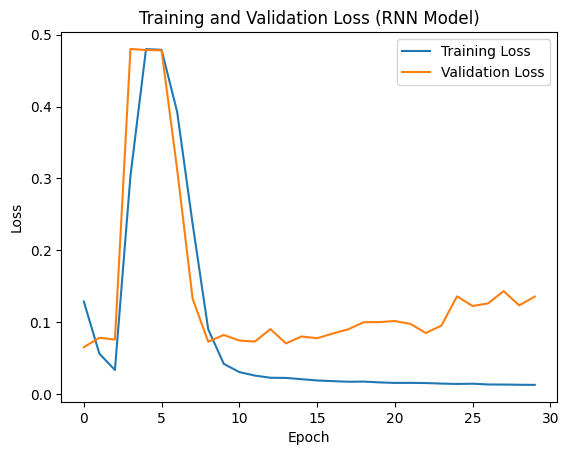

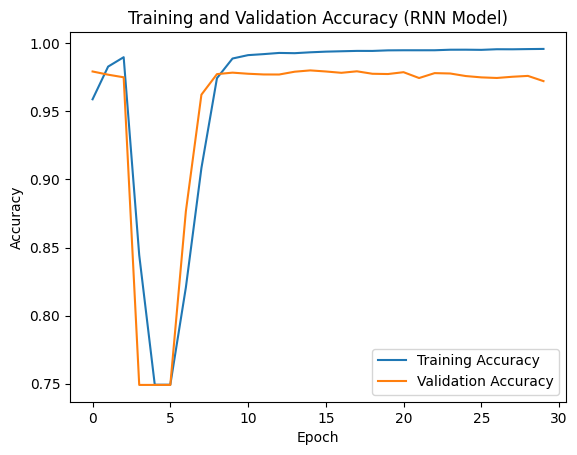

In [7]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (RNN Model)')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (RNN Model)')
plt.legend()
plt.show()

### Making predictions

Making predictions...
1875/1875 [==============================] - 292s 155ms/step
Accuracy: 0.97275
Confusion Matrix:
 [[29127   935]
 [  700 29238]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     30062
           1       0.97      0.98      0.97     29938

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000



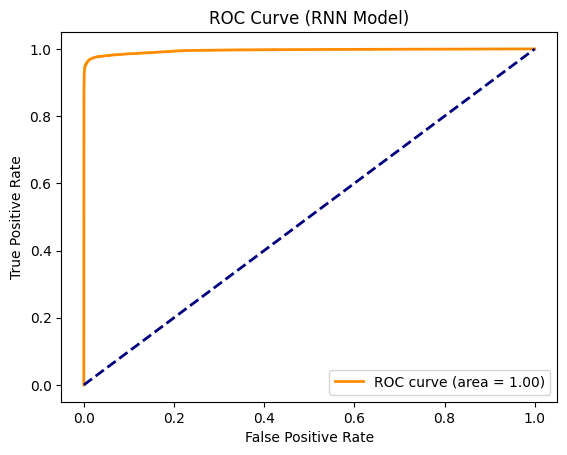

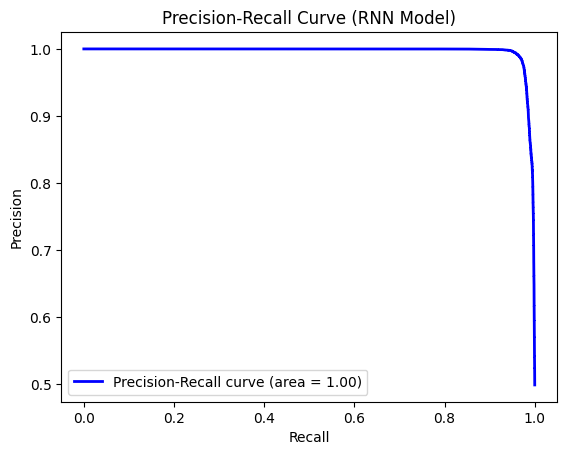

In [8]:
print('Making predictions...')

# Predictions
y_pred = RNN_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluation
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

# Calculate ROC curve and its area
fpr, tpr, thresholds_roc = roc_curve(y_test_classes, y_pred[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RNN Model)')
plt.legend(loc="lower right")
plt.show()

# Calculate Precision-Recall curve and its area
precision, recall, thresholds_pr = precision_recall_curve(y_test_classes, y_pred[:, 1])
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (RNN Model)')
plt.legend(loc="lower left")
plt.show()

### Graphs and threshold tests

Threshold: 0.05
Accuracy: 0.9153333333333333
Precision: 0.8613711693900099
Recall: 0.9895784621551206
False Positive: 0.15860554853303174
False Negative: 0.010421537844879418


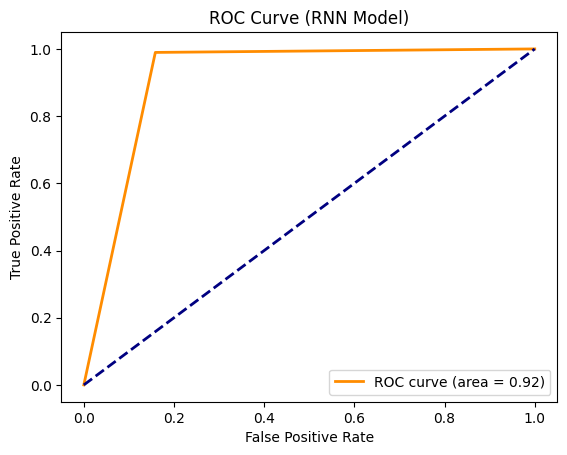

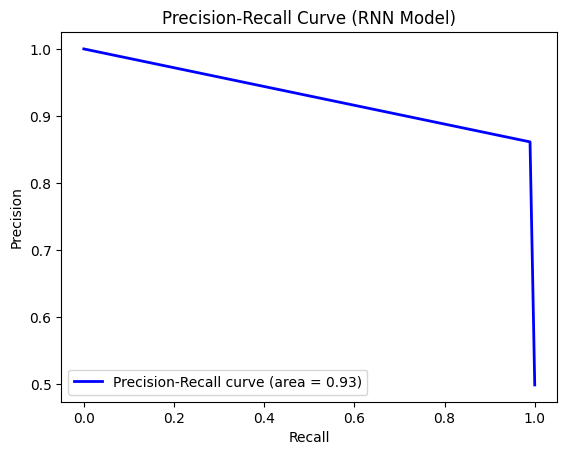

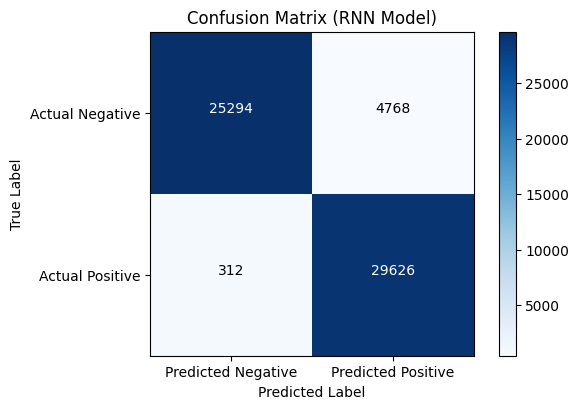



Threshold: 0.1
Accuracy: 0.9384166666666667
Precision: 0.9001067235859125
Recall: 0.9860044091121651
False Positive: 0.10897478544341693
False Negative: 0.013995590887834858


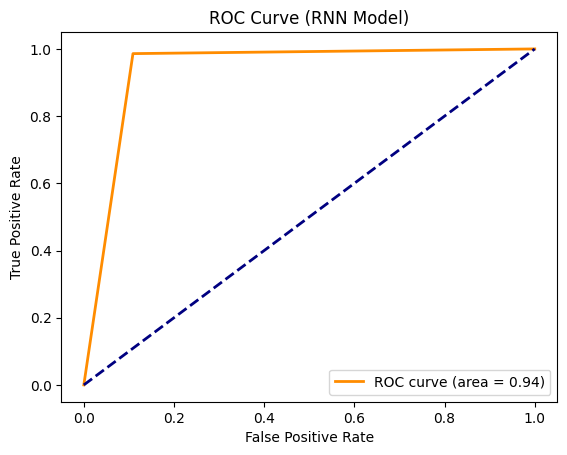

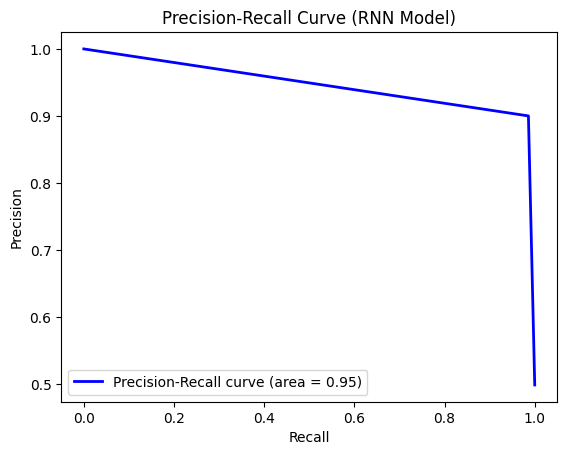

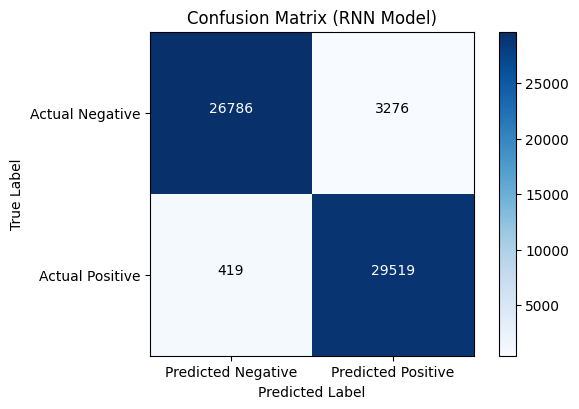



Threshold: 0.15
Accuracy: 0.9551166666666666
Precision: 0.9311872883233627
Recall: 0.9826641726234218
False Positive: 0.07231721109706607
False Negative: 0.017335827376578263


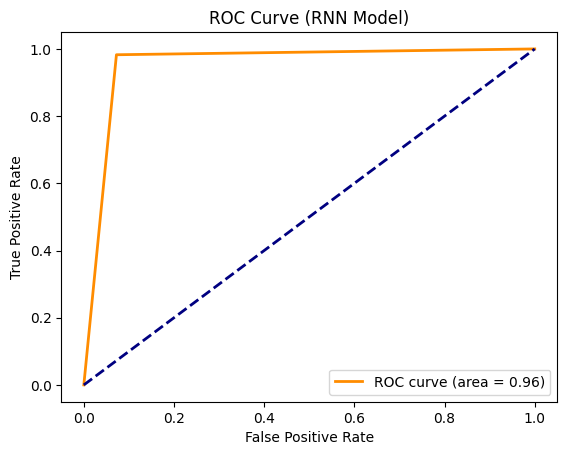

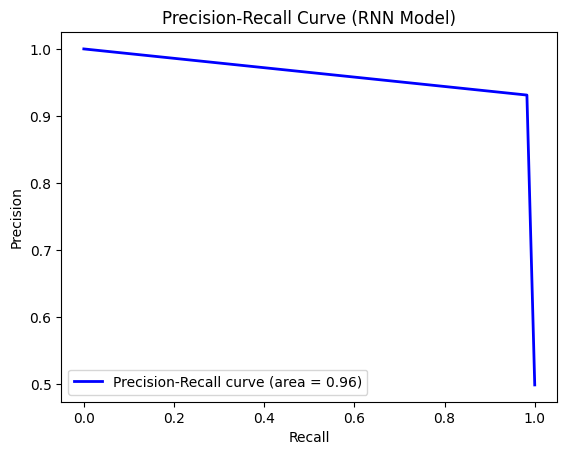

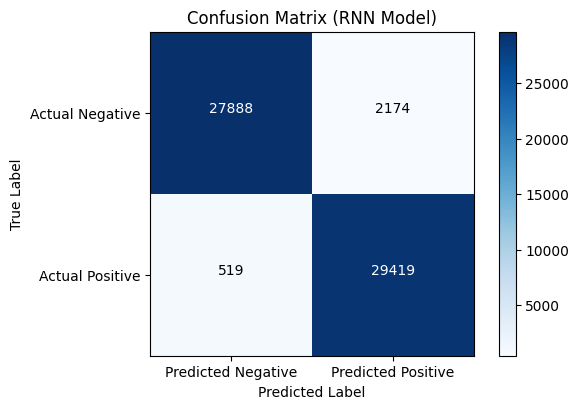



Threshold: 0.2
Accuracy: 0.9616
Precision: 0.9440480781591464
Recall: 0.9811944685683747
False Positive: 0.05791364513339099
False Negative: 0.01880553143162536


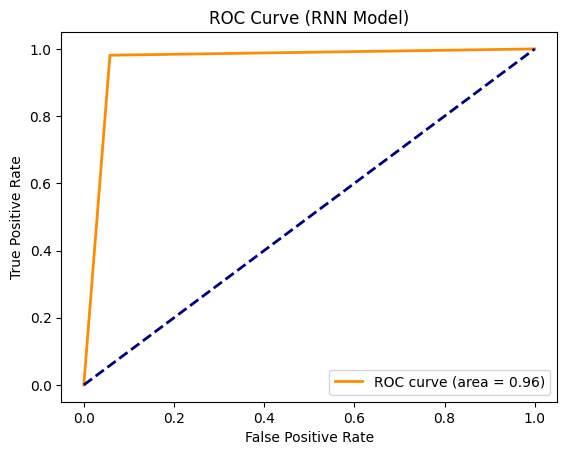

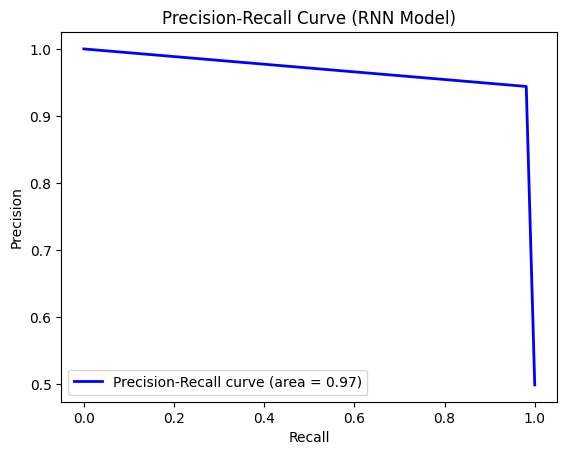

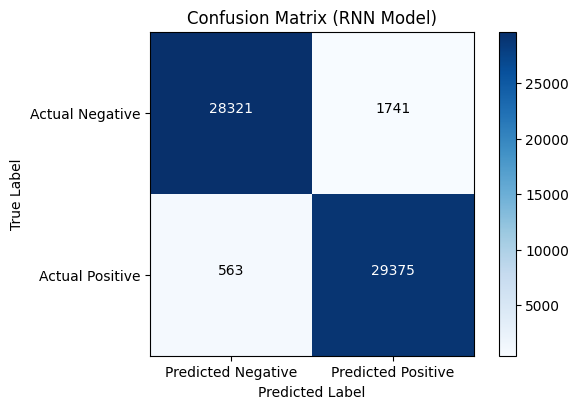



Threshold: 0.25
Accuracy: 0.9641666666666666
Precision: 0.9496440129449838
Recall: 0.9801589952568642
False Positive: 0.05175969662697093
False Negative: 0.019841004743135816


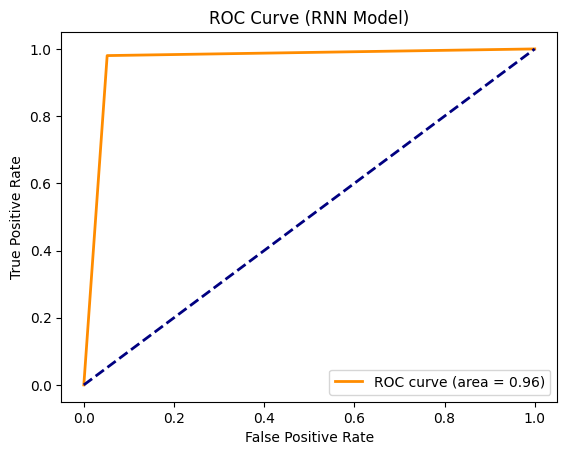

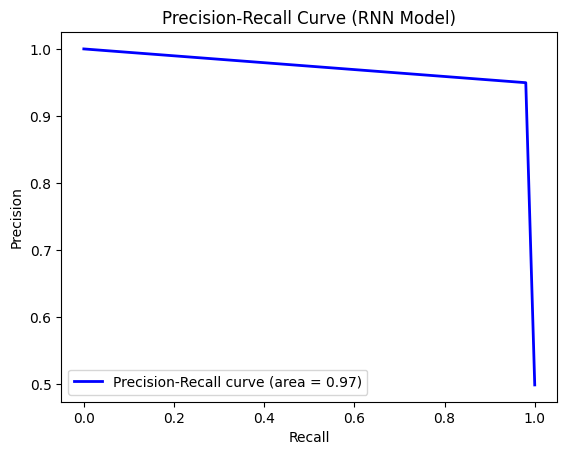

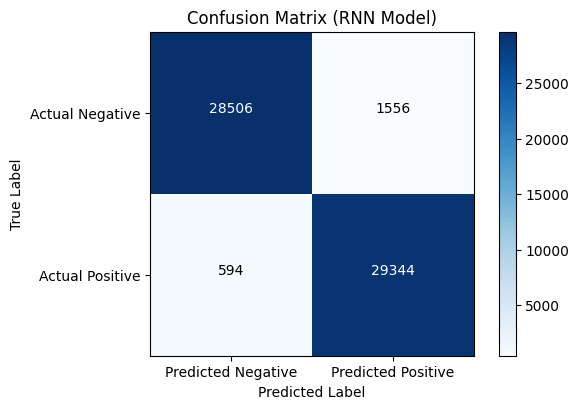



Threshold: 0.3
Accuracy: 0.9665666666666667
Precision: 0.9547704330836861
Recall: 0.9793907408644532
False Positive: 0.04620451067793227
False Negative: 0.020609259135546797


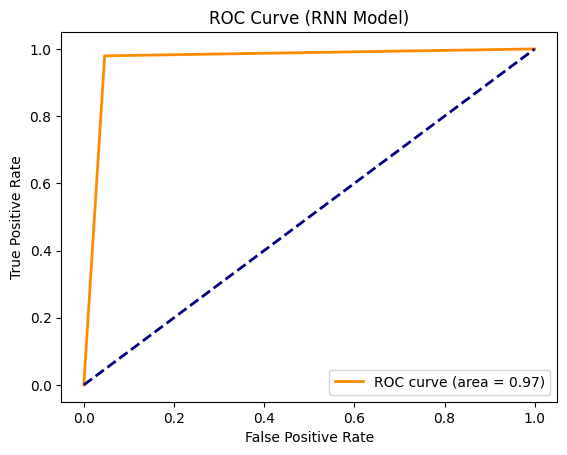

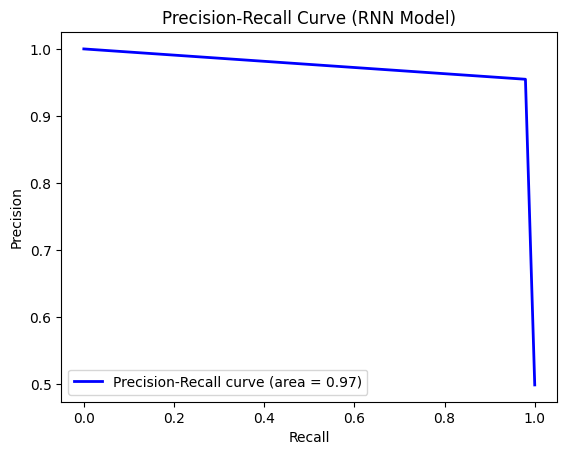

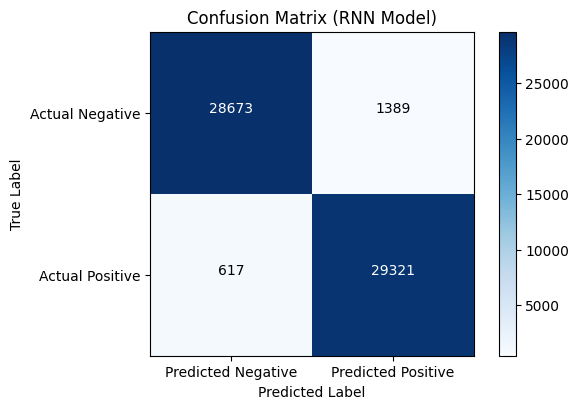



Threshold: 0.35
Accuracy: 0.9685166666666667
Precision: 0.9591723144419343
Recall: 0.9785556817422674
False Positive: 0.041480939391923356
False Negative: 0.021444318257732648


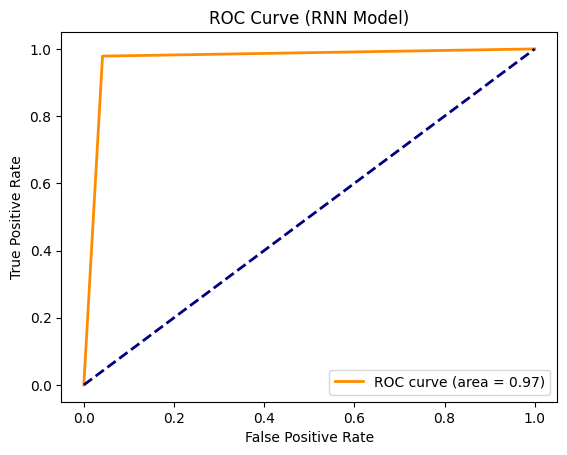

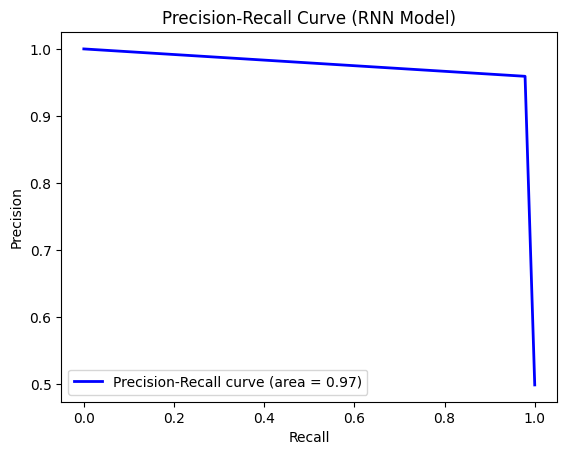

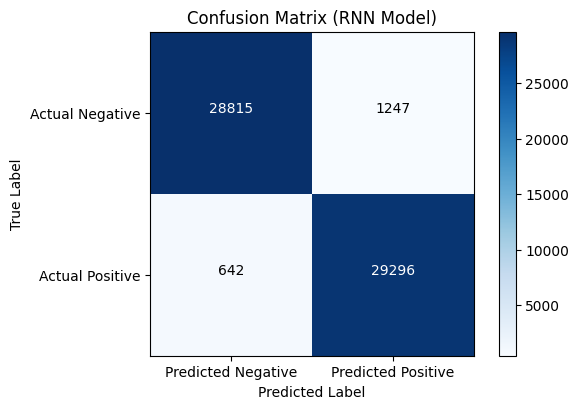



Threshold: 0.4
Accuracy: 0.97025
Precision: 0.9630275319890793
Recall: 0.9779210368094061
False Positive: 0.03738939524981705
False Negative: 0.022078963190593895


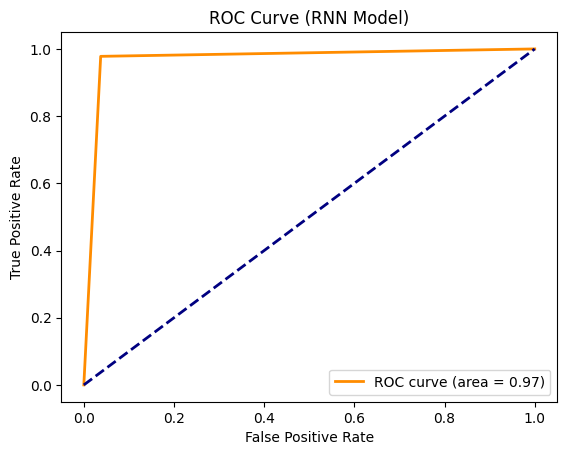

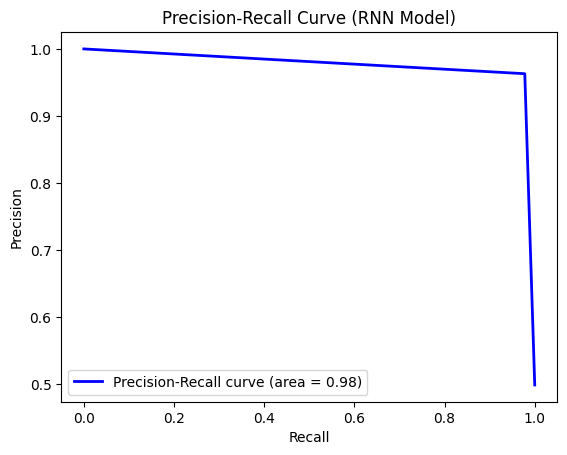

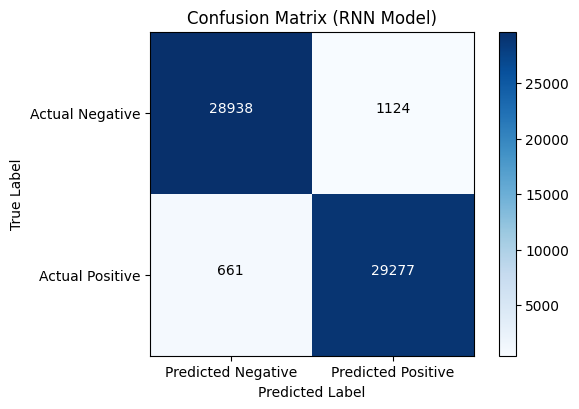



Threshold: 0.45
Accuracy: 0.9715166666666667
Precision: 0.9660558032029057
Recall: 0.9772529895116574
False Positive: 0.03419599494378285
False Negative: 0.022747010488342576


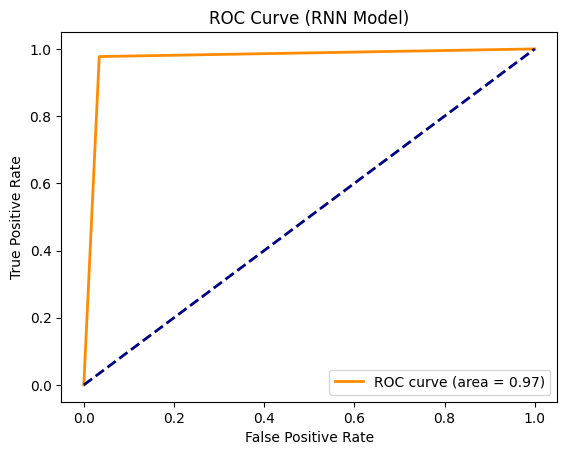

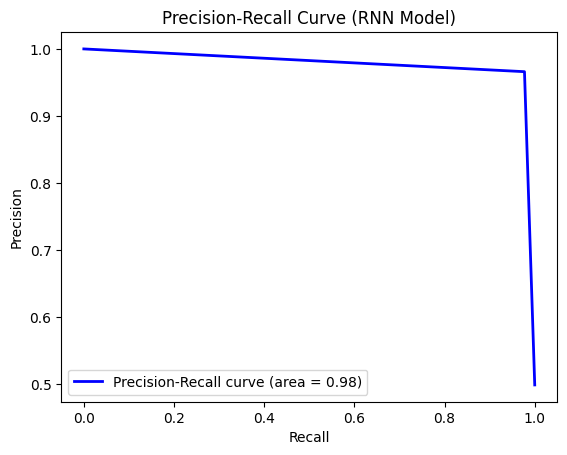

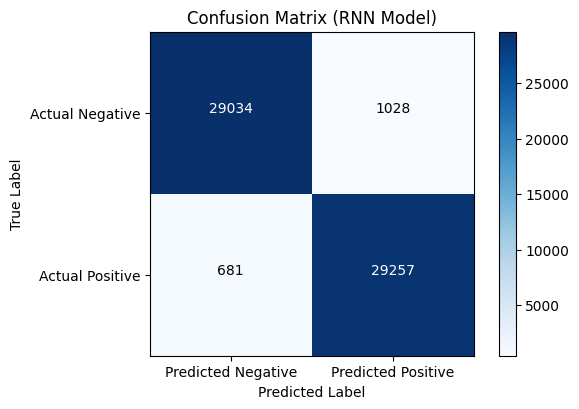



Threshold: 0.5
Accuracy: 0.97275
Precision: 0.969012030623405
Recall: 0.9766183445787961
False Positive: 0.031102388397312223
False Negative: 0.02338165542120382


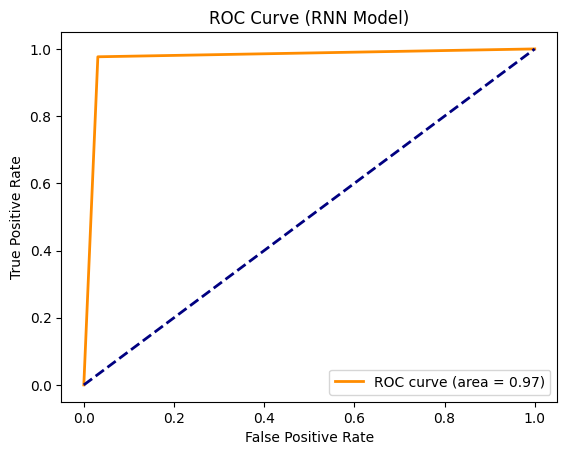

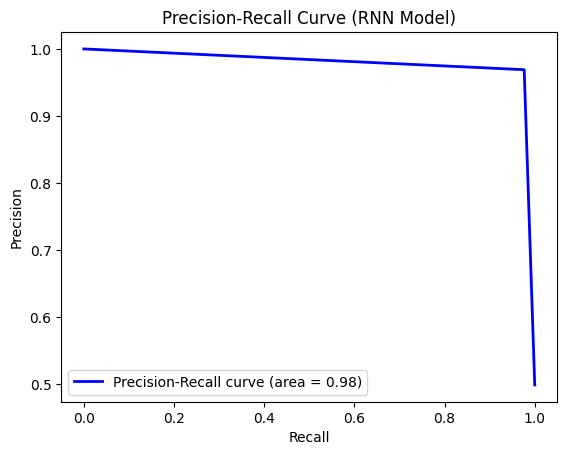

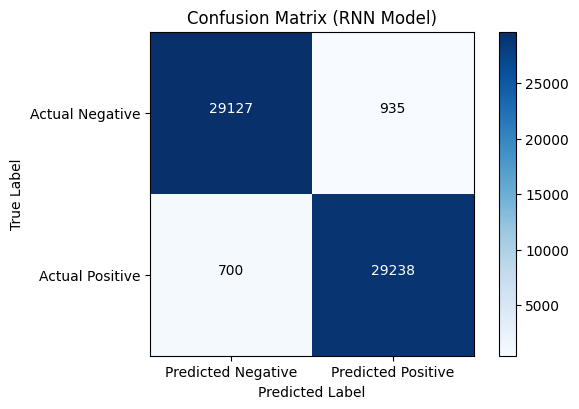



Threshold: 0.55
Accuracy: 0.974
Precision: 0.9719912181491585
Recall: 0.9760171020108224
False Positive: 0.028008781850841595
False Negative: 0.023982897989177635


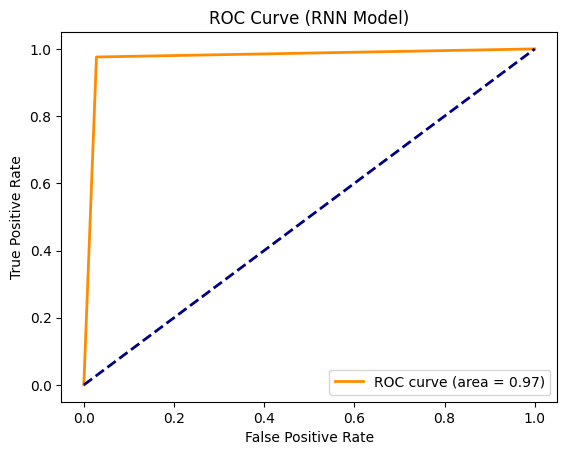

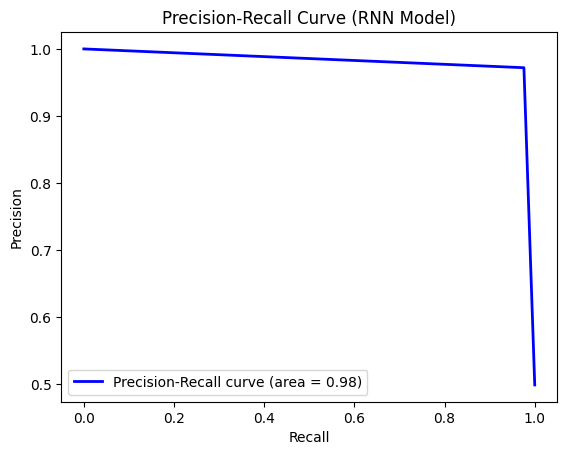

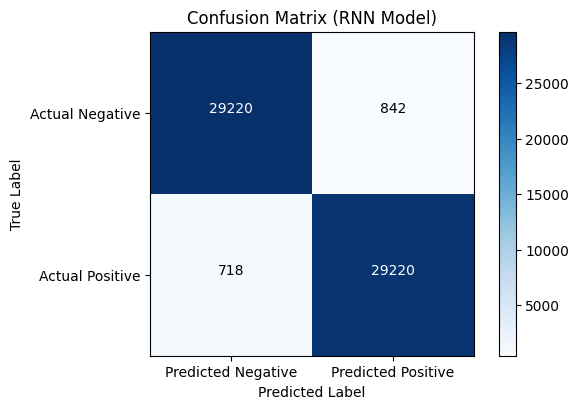



Threshold: 0.6
Accuracy: 0.9748333333333333
Precision: 0.9742426264513546
Recall: 0.9753490547130736
False Positive: 0.025680260794358326
False Negative: 0.024650945286926313


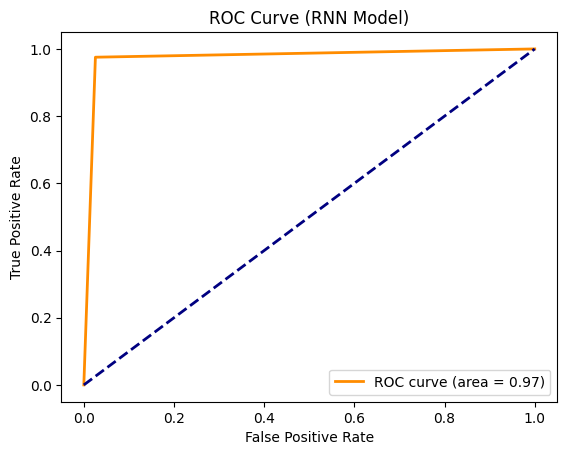

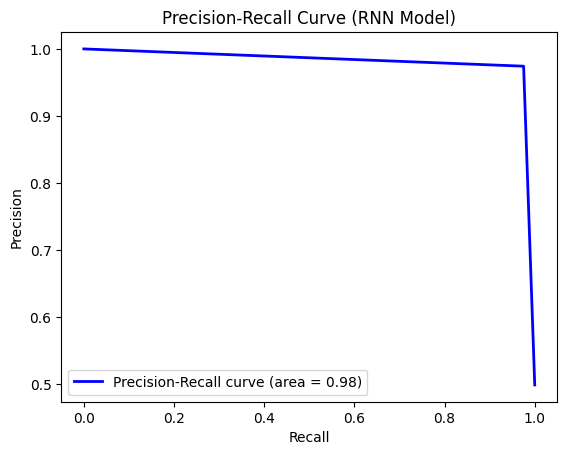

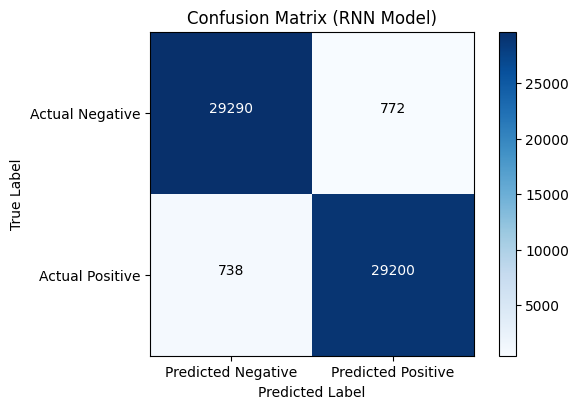



Threshold: 0.65
Accuracy: 0.97535
Precision: 0.9759189270544165
Recall: 0.9746476050504376
False Positive: 0.02395050229525647
False Negative: 0.02535239494956243


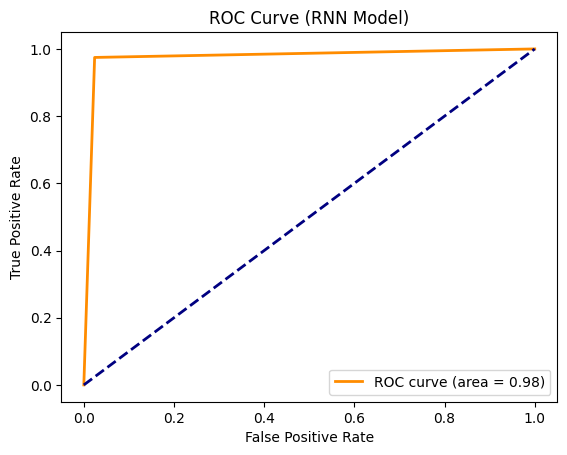

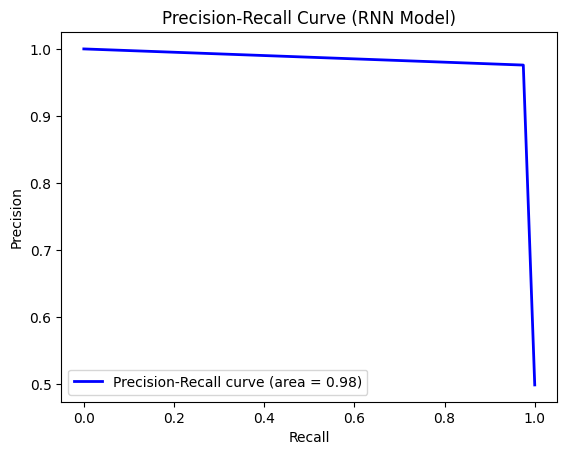

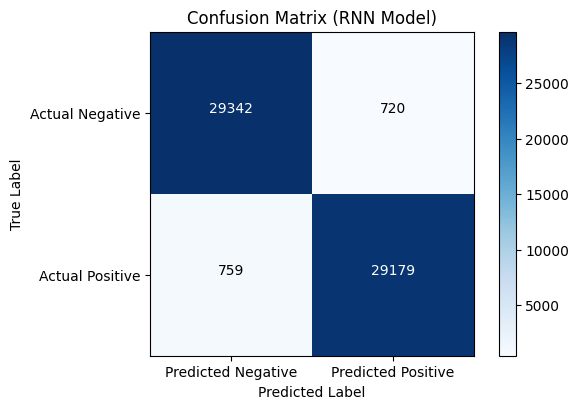



Threshold: 0.7
Accuracy: 0.9755333333333334
Precision: 0.9769163763066202
Recall: 0.9739795577526889
False Positive: 0.022919300113099596
False Negative: 0.02602044224731111


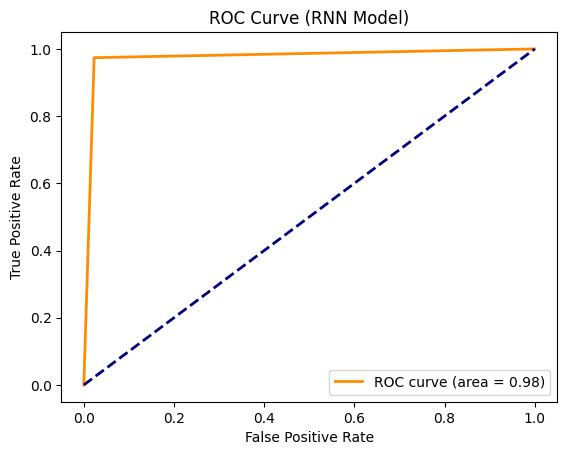

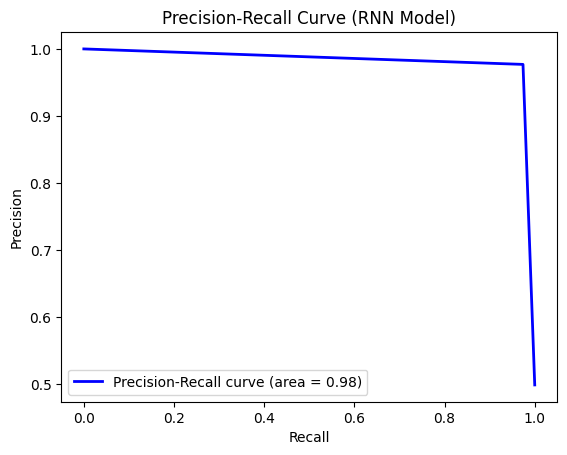

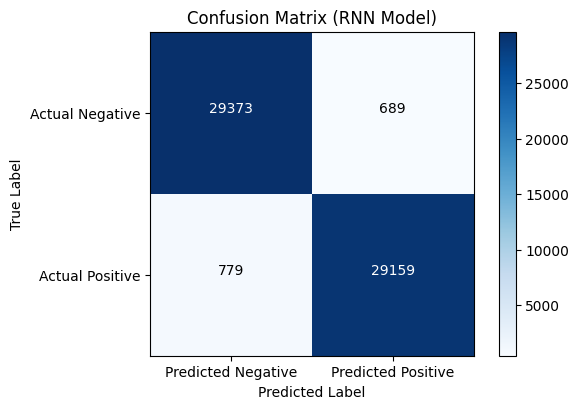



Threshold: 0.75
Accuracy: 0.9758
Precision: 0.9780171835145657
Recall: 0.9733783151847151
False Positive: 0.02178830417137915
False Negative: 0.026621684815284923


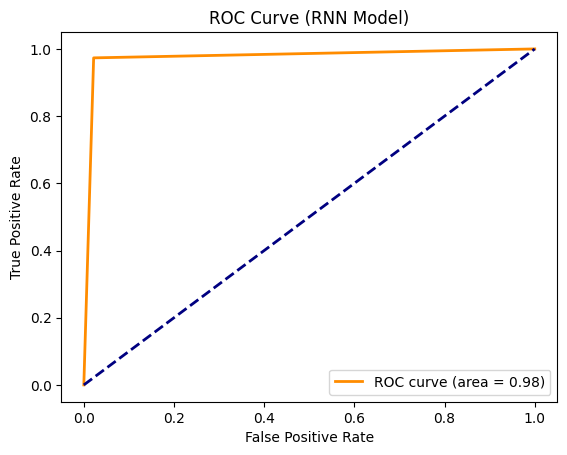

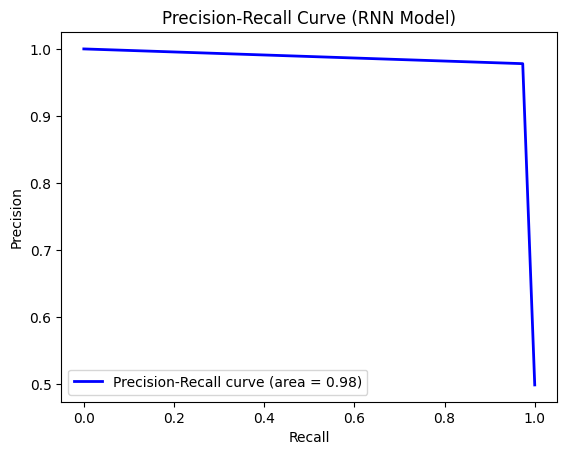

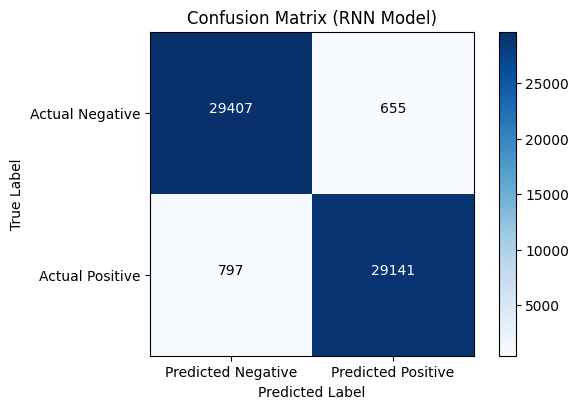



Threshold: 0.8
Accuracy: 0.9762666666666666
Precision: 0.9794525154694647
Recall: 0.9728438773465161
False Positive: 0.02032466236444681
False Negative: 0.027156122653483866


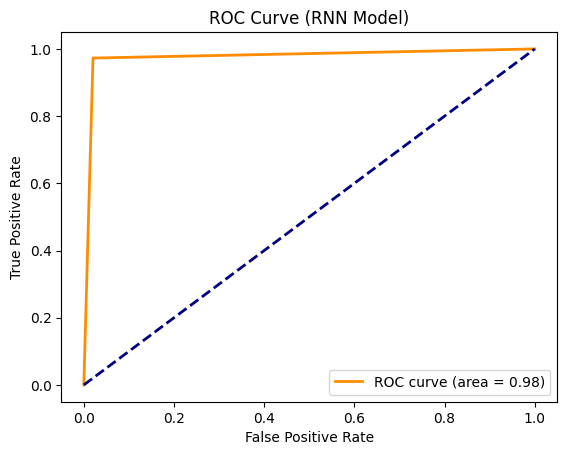

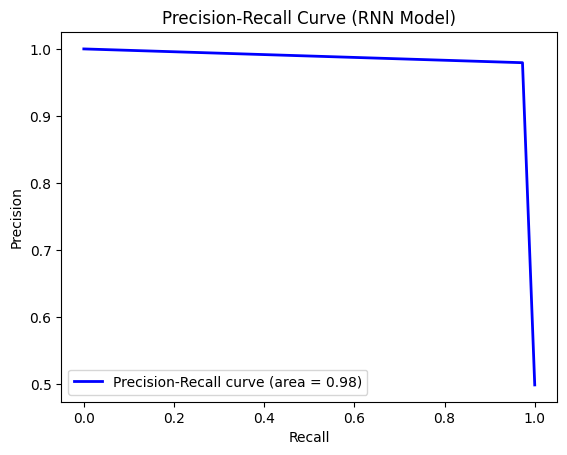

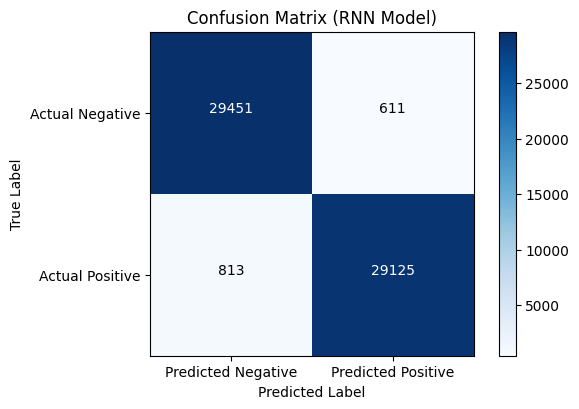



Threshold: 0.85
Accuracy: 0.97665
Precision: 0.9805665016334917
Recall: 0.9724764513327544
False Positive: 0.019193666422726366
False Negative: 0.027523548667245643


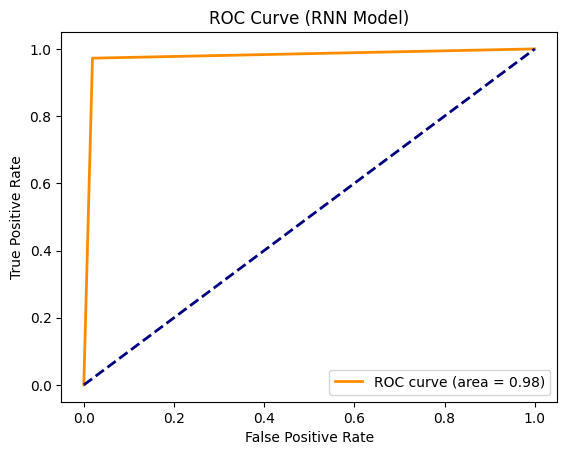

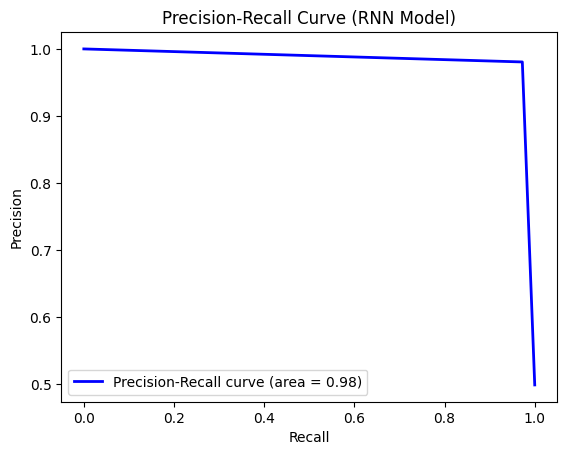

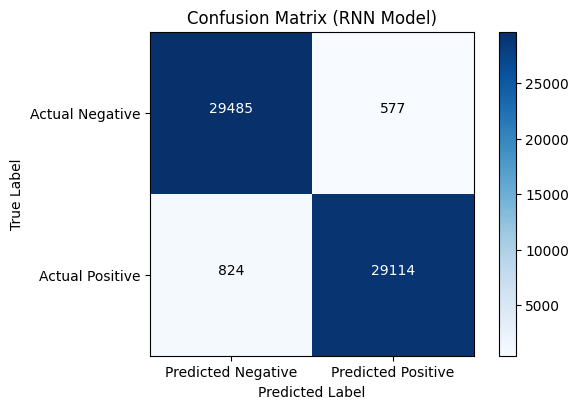



Threshold: 0.9
Accuracy: 0.9772666666666666
Precision: 0.9826037022024051
Recall: 0.9716413922105686
False Positive: 0.017131262058412613
False Negative: 0.028358607789431493


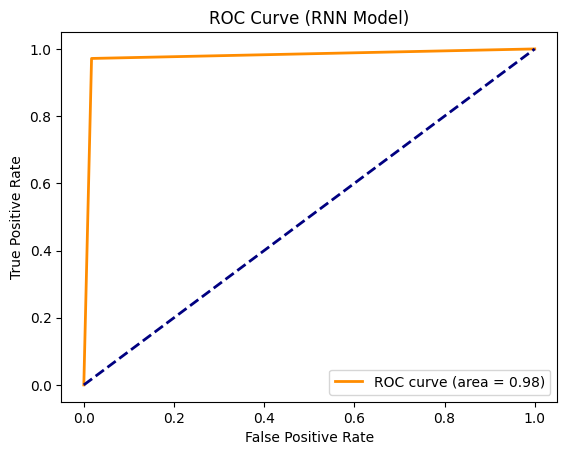

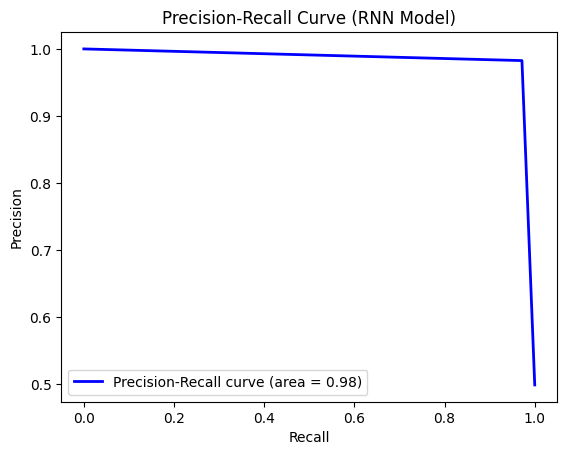

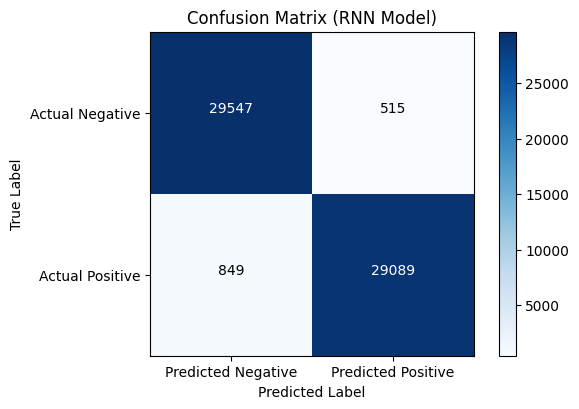



Threshold: 0.95
Accuracy: 0.97765
Precision: 0.9848757163688155
Recall: 0.9701048834257465
False Positive: 0.014836005588450536
False Negative: 0.029895116574253457


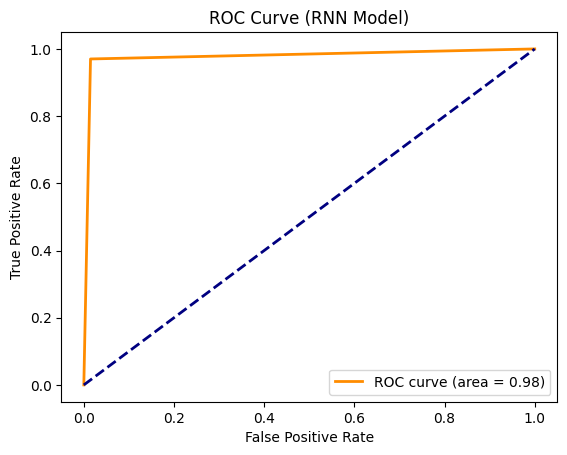

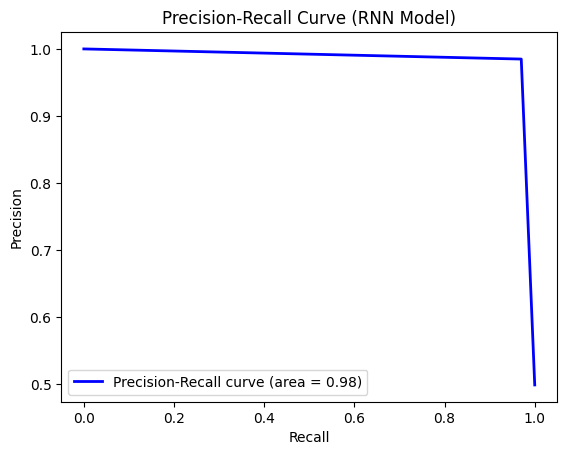

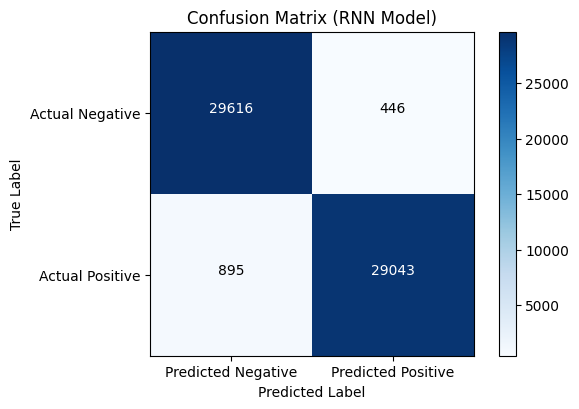

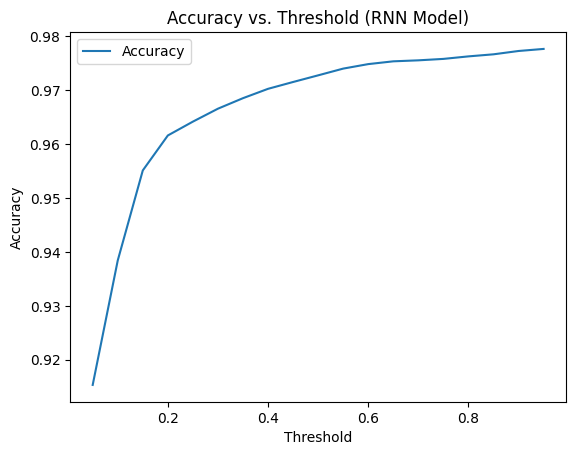

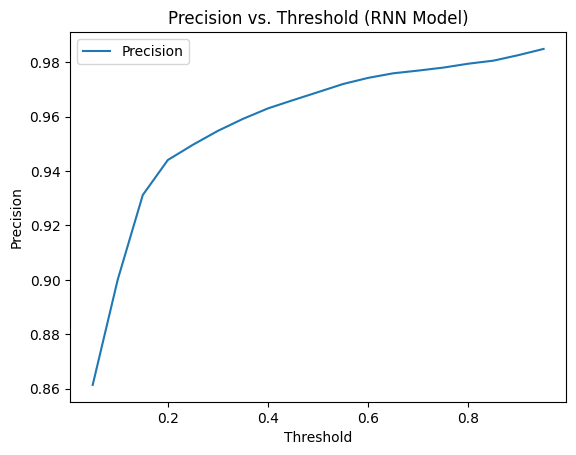

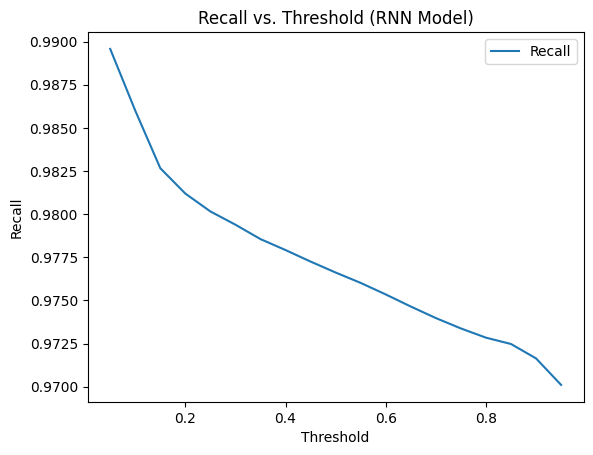

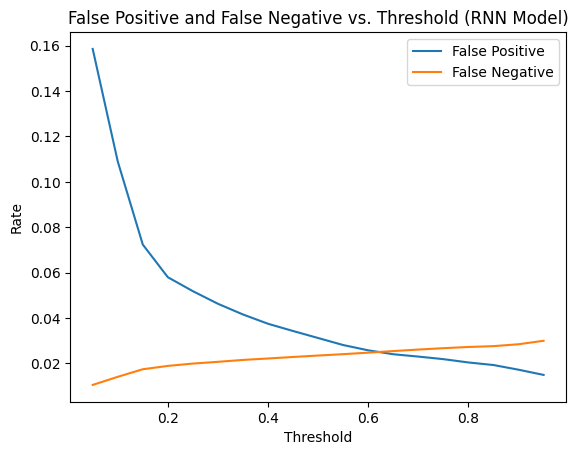

Maximum Accuracy: 0.97765
Best Threshold: 0.95


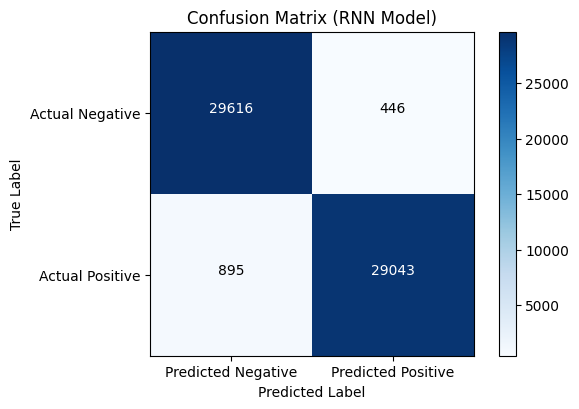

In [16]:
# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    
    # Convert probabilities to class predictions based on the threshold
    y_pred_classes = (y_pred[:, 1] >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes)
    recall = recall_score(y_test_classes, y_pred_classes)
    confusion = confusion_matrix(y_test_classes, y_pred_classes)
    false_positive = confusion[0][1] / float(np.sum(confusion[0]))
    false_negative = confusion[1][0] / float(np.sum(confusion[1]))

    # Append evaluation metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive:", false_positive)
    print("False Negative:", false_negative)
    
    fpr, tpr, thresholds_roc = roc_curve(y_test_classes, y_pred_classes)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (RNN Model)')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate Precision-Recall curve and its area
    precision, recall, thresholds_pr = precision_recall_curve(y_test_classes, y_pred_classes)
    pr_auc = auc(recall, precision)

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (RNN Model)')
    plt.legend(loc="lower left")
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix (RNN Model)')
    plt.colorbar()

    # Add labels to the plot
    tick_marks = np.arange(len(conf_matrix))
    plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
    plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

    # Add text annotations
    thresh = confusion.max() / 2.
    for i in range(confusion.shape[0]):
        for j in range(confusion.shape[1]):
            plt.text(j, i, format(confusion[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print('\n')
    
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (RNN Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

y_pred_classes = (y_pred[:, 1] >= 0.95).astype(int)

# Define the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (RNN Model)')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks, ['Predicted Negative', 'Predicted Positive'])
plt.yticks(tick_marks, ['Actual Negative', 'Actual Positive'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
